## 4.3 Monte Carlo Simulation of the Ising Model

The Ising Model is a simplified version of a ferromagnet - where the structure of the material consist of a single dipole per lattice site. The overall magnetization of the material is determined by the number of dipoles that are aligned parallel to one-another. The Ising Model is a beautifully simpl demonstration of the implications of statistical mechanics and phase transitions - as well a being an fantastic example of the power of Monte Carlo Simulations.

### Model descriptions

1. Create a 2D lattice using 2D array of size 50x50

2. Fill the arrays with spin states using -1 or +1 randomly

3. Randomly select an element from the 2D lattice

4. Flip the spin state of the selected element and calculate the change in energy due to the flipping process:
    
    $${E_{mn}} =  - 2\sum\limits_{ij} {{s_{ij}}{s_{mn}}} $$

5. if ${E_{mn}} \le 0$ then the spin is permanently flipped,
   else calculate the Boltzmann's probability, $p$:
   
   $$p = {e^{ - \beta {E_{mn}}}}$$
 
    random a number $x$ btween 0 and 1:

    if $x \le p$ then spin is permanently flipped.

    otherwise, spin returns to its original state.
    
6. Plot 2D grid

7. Repeat step 3 for 100,000 times

In [67]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [72]:
lattice = np.where(np.random.randint(2, size=(50, 50)) == 0, -1, 1)
beta = 1000
# k = scipy.constant.Boltzmann
# T = 100
# beta = 1/(k*T)
frames = []
for _ in range(10000):
    oldlattice = lattice.copy()
    i = np.random.randint(1,49)
    j = np.random.randint(1,49)
    E = -2 *(-1* lattice[i][j]* lattice[i-1][j] + -1* lattice[i][j]* lattice[i+1][j] + -1* lattice[i][j]* lattice[i][j-1] + -1* lattice[i][j]* lattice[i][j+1])
    if E <= 0:
        lattice[i][j] = -lattice[i][j]
    else:
        p = np.exp(-beta*E)
        if np.random.uniform(0, 1) <= p:
            lattice[i][j] = -lattice[i][j]
    frames.append(oldlattice)

<function matplotlib.pyplot.show(close=None, block=None)>

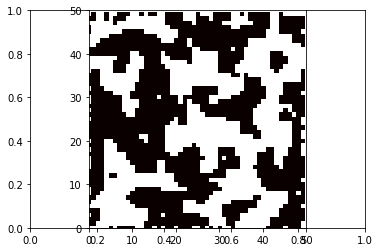

In [74]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 50), ylim=(0, 50))
line = plt.imshow(frames[0],cmap="hot")


def animate(i):
    line.set_array(frames[i])
    return line

anim = animation.FuncAnimation(fig, animate, frames=(len(frames)), repeat=False)
anim.save('ising model.mp4', fps = 1000)
plt.show